In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- 1. Load and Preprocess the Fashion MNIST Dataset ---
# Fashion MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples
# and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label
# from 10 classes.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
# Images are 28x28 grayscale, so each pixel has a value from 0-255.
# We flatten the 28x28 images into a 784-dimensional vector for the MLP.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Reshape images for MLP (flatten 28x28 to 784)
train_images_flat = train_images.reshape(-1, 28 * 28)
test_images_flat = test_images.reshape(-1, 28 * 28)

In [5]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(f"Train images shape (flattened): {train_images_flat.shape}")
print(f"Test images shape (flattened): {test_images_flat.shape}")
print(f"Number of classes: {len(np.unique(train_labels))}")

Train images shape (flattened): (60000, 784)
Test images shape (flattened): (10000, 784)
Number of classes: 10


In [9]:
# Experiment 1: Single Hidden Layer, ReLU Activation
model_name_1 = 'MLP_1_Hidden_ReLU'
hidden_layers_config_1 = [128]
activation_function_1 = 'relu'
print(f"\n--- Training Model: {model_name_1} ---")


--- Training Model: MLP_1_Hidden_ReLU ---


In [10]:
model_1_relu = keras.Sequential([
    keras.layers.Input(shape=(28 * 28,)),
    keras.layers.Dense(hidden_layers_config_1[0], activation=activation_function_1),
    keras.layers.Dense(10, activation='softmax')
])

model_1_relu.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
model_1_relu.summary()
history_1_relu = model_1_relu.fit(train_images_flat, train_labels, epochs=10, batch_size=64,
                                 validation_data=(test_images_flat, test_labels), verbose=1)
test_loss_1, test_acc_1 = model_1_relu.evaluate(test_images_flat, test_labels, verbose=0)
print(f"Test Accuracy for {model_name_1}: {test_acc_1:.4f}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7716 - loss: 0.6704 - val_accuracy: 0.8286 - val_loss: 0.4632
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8630 - loss: 0.3936 - val_accuracy: 0.8532 - val_loss: 0.4123
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8716 - loss: 0.3573 - val_accuracy: 0.8676 - val_loss: 0.3798
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8802 - loss: 0.3330 - val_accuracy: 0.8711 - val_loss: 0.3609
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8878 - loss: 0.3062 - val_accuracy: 0.8722 - val_loss: 0.3534
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8924 - loss: 0.2921 - val_accuracy: 0.8785 - val_loss: 0.3437
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8977 - loss: 0.2761 - val_accuracy: 0.8824 - val_loss: 0.3289
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9034 - loss: 0.2644 - val_accuracy: 0.

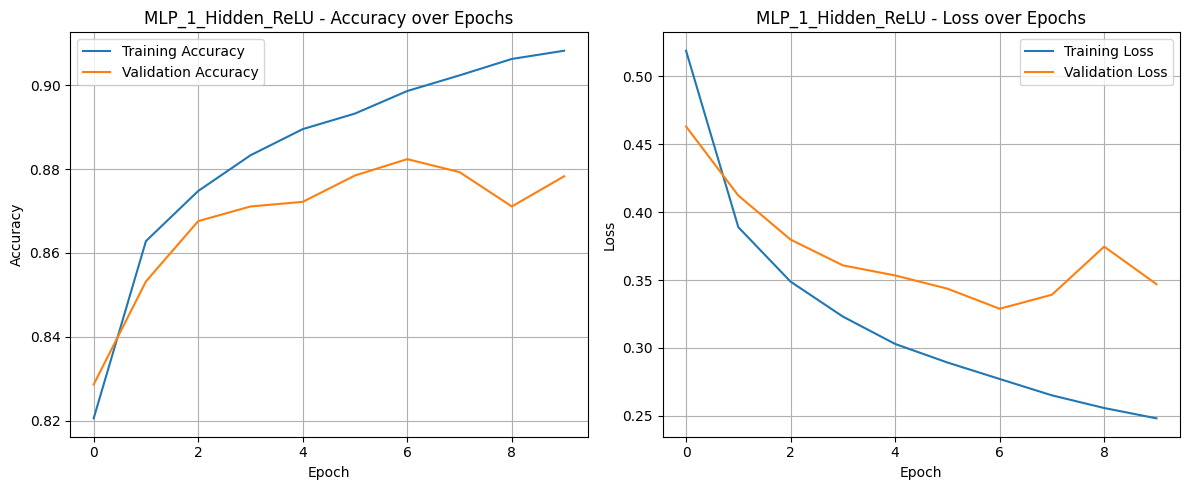

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1_relu.history['accuracy'], label='Training Accuracy')
plt.plot(history_1_relu.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{model_name_1} - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_1_relu.history['loss'], label='Training Loss')
plt.plot(history_1_relu.history['val_loss'], label='Validation Loss')
plt.title(f'{model_name_1} - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Experiment 2: Two Hidden Layers, ReLU Activation
model_name_2 = 'MLP_2_Hidden_ReLU'
hidden_layers_config_2 = [256, 128]
activation_function_2 = 'relu'
print(f"\n--- Training Model: {model_name_2} ---")


--- Training Model: MLP_2_Hidden_ReLU ---


In [13]:
model_2_relu = keras.Sequential([
    keras.layers.Input(shape=(28 * 28,)),
    keras.layers.Dense(hidden_layers_config_2[0], activation=activation_function_2),
    keras.layers.Dense(hidden_layers_config_2[1], activation=activation_function_2),
    keras.layers.Dense(10, activation='softmax')
])

model_2_relu.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
model_2_relu.summary()
history_2_relu = model_2_relu.fit(train_images_flat, train_labels, epochs=10, batch_size=64,
                                 validation_data=(test_images_flat, test_labels), verbose=1)
test_loss_2, test_acc_2 = model_2_relu.evaluate(test_images_flat, test_labels, verbose=0)
print(f"Test Accuracy for {model_name_2}: {test_acc_2:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7819 - loss: 0.6250 - val_accuracy: 0.8380 - val_loss: 0.4446
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8634 - loss: 0.3697 - val_accuracy: 0.8545 - val_loss: 0.3951
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8784 - loss: 0.3243 - val_accuracy: 0.8688 - val_loss: 0.3615
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8885 - loss: 0.3016 - val_accuracy: 0.8654 - val_loss: 0.3683
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8909 - loss: 0.2873 - val_accuracy: 0.8794 - val_loss: 0.3356
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8959 - loss: 0.2716 - val_accuracy: 0.8798 - val_loss: 0.3316
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9046 - loss: 0.2530 - val_accuracy: 0.8762 - val_loss: 0.3462
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9076 - loss: 0.2457 - val_accuracy: 

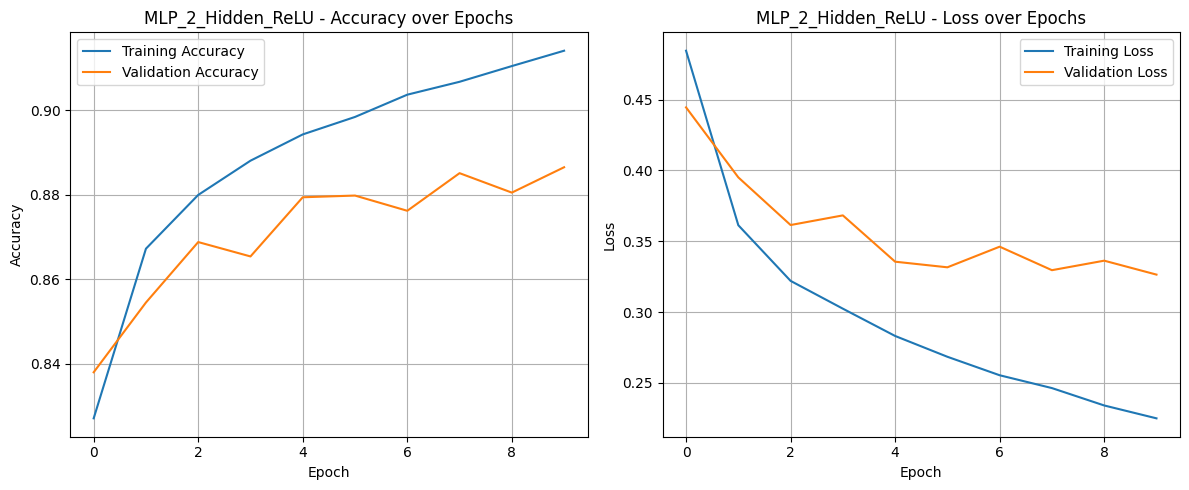

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_2_relu.history['accuracy'], label='Training Accuracy')
plt.plot(history_2_relu.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{model_name_2} - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_2_relu.history['loss'], label='Training Loss')
plt.plot(history_2_relu.history['val_loss'], label='Validation Loss')
plt.title(f'{model_name_2} - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Experiment 3: Single Hidden Layer, Sigmoid Activation
model_name_3 = 'MLP_1_Hidden_Sigmoid'
hidden_layers_config_3 = [128]
activation_function_3 = 'sigmoid'
print(f"\n--- Training Model: {model_name_3} ---")


--- Training Model: MLP_1_Hidden_Sigmoid ---


In [16]:
model_1_sigmoid = keras.Sequential([
    keras.layers.Input(shape=(28 * 28,)),
    keras.layers.Dense(hidden_layers_config_3[0], activation=activation_function_3),
    keras.layers.Dense(10, activation='softmax')
])

model_1_sigmoid.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])
model_1_sigmoid.summary()
history_1_sigmoid = model_1_sigmoid.fit(train_images_flat, train_labels, epochs=10, batch_size=64,
                                       validation_data=(test_images_flat, test_labels), verbose=1)
test_loss_3, test_acc_3 = model_1_sigmoid.evaluate(test_images_flat, test_labels, verbose=0)
print(f"Test Accuracy for {model_name_3}: {test_acc_3:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7350 - loss: 0.8273 - val_accuracy: 0.8352 - val_loss: 0.4620
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8477 - loss: 0.4277 - val_accuracy: 0.8498 - val_loss: 0.4197
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8669 - loss: 0.3776 - val_accuracy: 0.8569 - val_loss: 0.4046
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8750 - loss: 0.3470 - val_accuracy: 0.8622 - val_loss: 0.3919
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8796 - loss: 0.3370 - val_accuracy: 0.8670 - val_loss: 0.3719
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8856 - loss: 0.3159 - val_accuracy: 0.8719 - val_loss: 0.3584
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8907 - loss: 0.3008 - val_accuracy: 0.8694 - val_loss: 0.3606
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8957 - loss: 0.2892 - val_accuracy: 0.

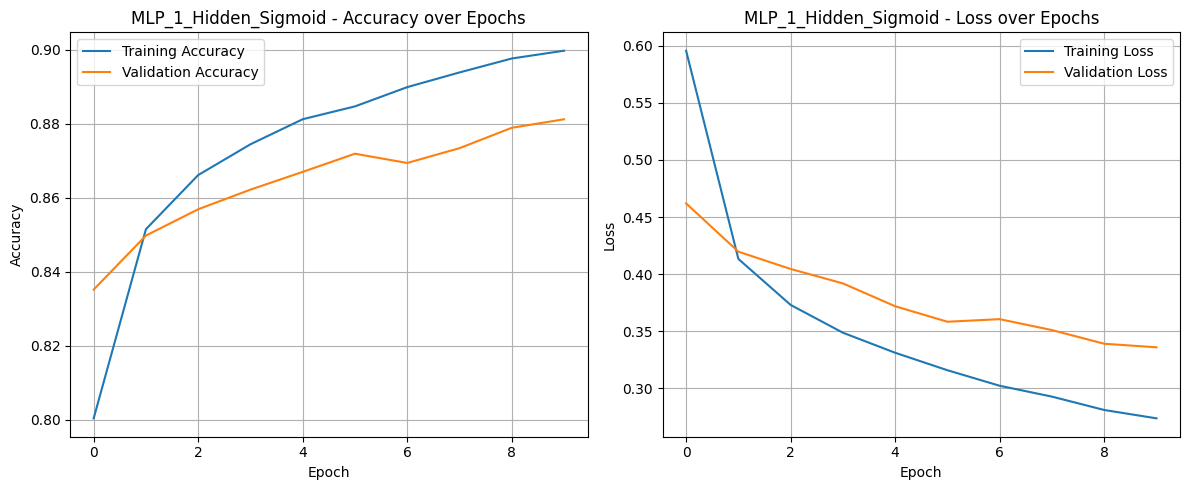

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1_sigmoid.history['accuracy'], label='Training Accuracy')
plt.plot(history_1_sigmoid.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{model_name_3} - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_1_sigmoid.history['loss'], label='Training Loss')
plt.plot(history_1_sigmoid.history['val_loss'], label='Validation Loss')
plt.title(f'{model_name_3} - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Experiment 4: Two Hidden Layers, Tanh Activation
model_name_4 = 'MLP_2_Hidden_Tanh'
hidden_layers_config_4 = [256, 128]
activation_function_4 = 'tanh'
print(f"\n--- Training Model: {model_name_4} ---")


--- Training Model: MLP_2_Hidden_Tanh ---


In [19]:
model_2_tanh = keras.Sequential([
    keras.layers.Input(shape=(28 * 28,)),
    keras.layers.Dense(hidden_layers_config_4[0], activation=activation_function_4),
    keras.layers.Dense(hidden_layers_config_4[1], activation=activation_function_4),
    keras.layers.Dense(10, activation='softmax')
])

model_2_tanh.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
model_2_tanh.summary()
history_2_tanh = model_2_tanh.fit(train_images_flat, train_labels, epochs=10, batch_size=64,
                                  validation_data=(test_images_flat, test_labels), verbose=1)
test_loss_4, test_acc_4 = model_2_tanh.evaluate(test_images_flat, test_labels, verbose=0)
print(f"Test Accuracy for {model_name_4}: {test_acc_4:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7859 - loss: 0.5928 - val_accuracy: 0.8202 - val_loss: 0.4746
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8640 - loss: 0.3705 - val_accuracy: 0.8648 - val_loss: 0.3733
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8777 - loss: 0.3314 - val_accuracy: 0.8658 - val_loss: 0.3676
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8851 - loss: 0.3090 - val_accuracy: 0.8771 - val_loss: 0.3428
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8903 - loss: 0.2917 - val_accuracy: 0.8809 - val_loss: 0.3328
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8991 - loss: 0.2673 - val_accuracy: 0.8589 - val_loss: 0.3955
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9025 - loss: 0.2620 - val_accuracy: 0.8760 - val_loss: 0.3397
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9065 - loss: 0.2460 - val_accuracy

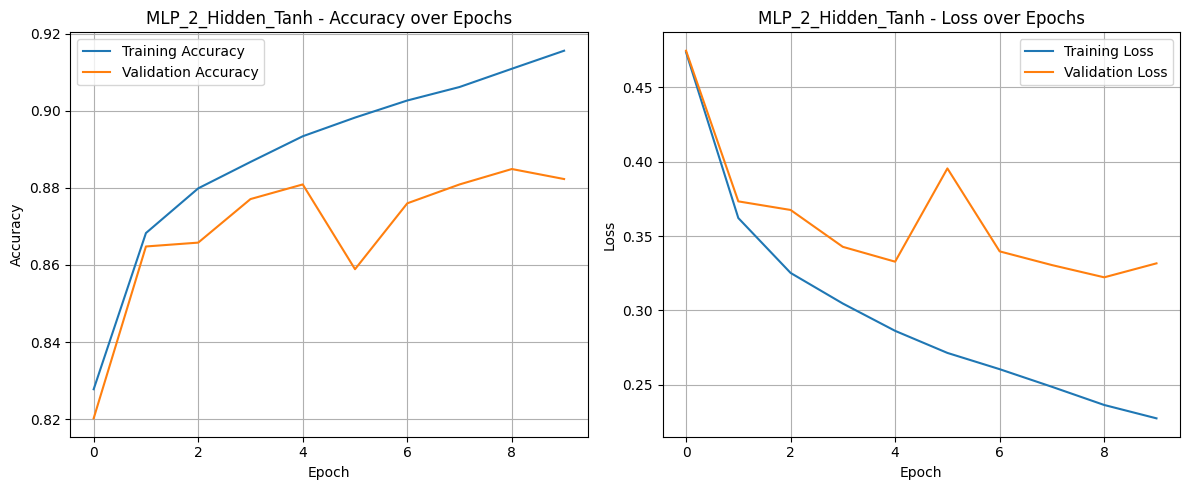

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_2_tanh.history['accuracy'], label='Training Accuracy')
plt.plot(history_2_tanh.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{model_name_4} - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_2_tanh.history['loss'], label='Training Loss')
plt.plot(history_2_tanh.history['val_loss'], label='Validation Loss')
plt.title(f'{model_name_4} - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Show the first 5 test images, their predicted labels, and true labels
def plot_image_prediction(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%) "
               f"(True: {class_names[true_label]})",
               color=color)

In [23]:
def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [25]:
# Make predictions using the best performing model (model_2_relu)
predictions = model_2_relu.predict(test_images_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


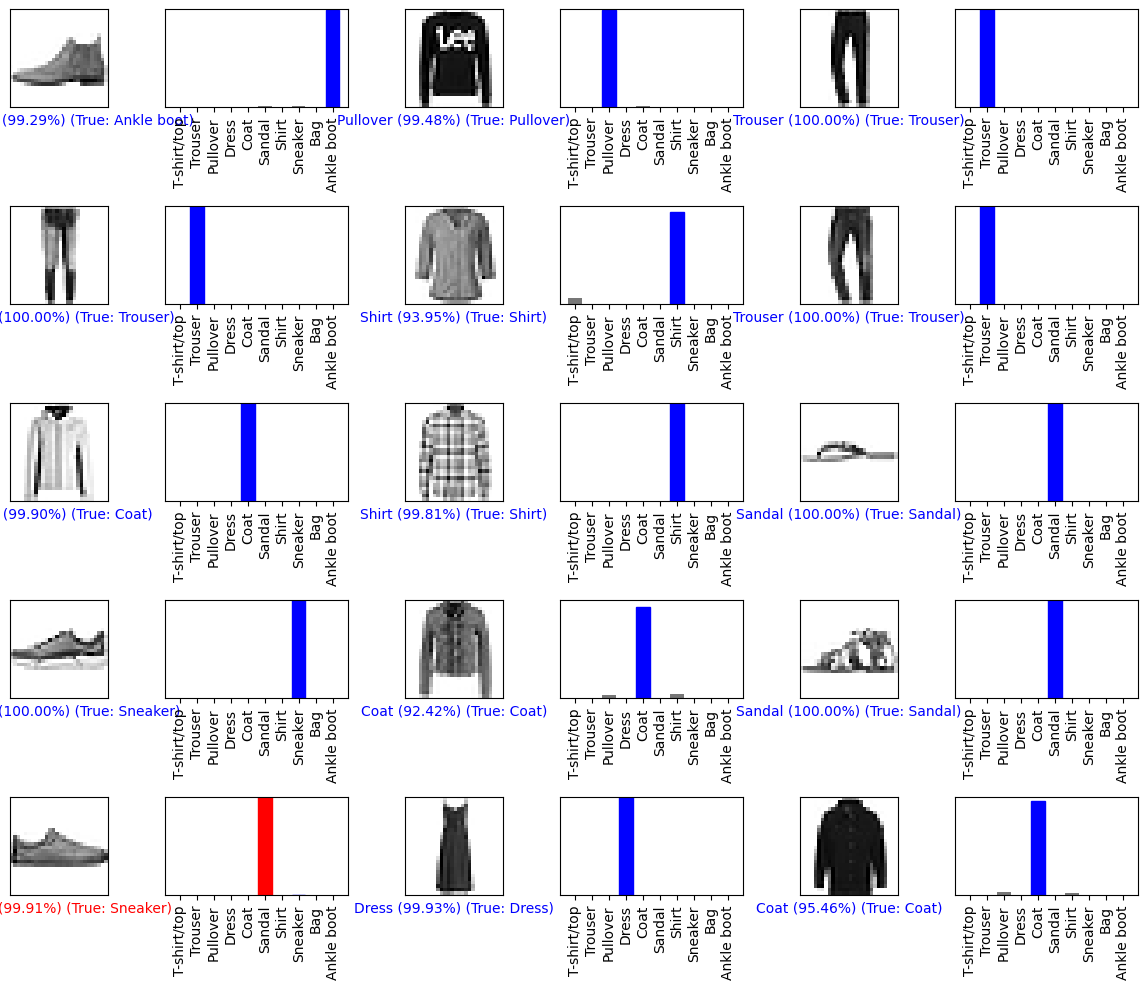

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image_prediction(i, predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels[i])
plt.tight_layout()
plt.show()